In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats
from imblearn.metrics import sensitivity_specificity_support
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

In [2]:
data = pd.read_csv('Sold_And_Stats_Edited_New.csv')
data.head()

,Listing Number,Street Number,Street Number Modifier,Street Direction,Street Name,Street Suffix,Street Post Direction,City,State,Zip Code,Area,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Square Footage,Style Code,Selling Date
0,1106139,10457,NaN,NaN,Des Moines Memorial,Dr,NaN,Seattle,WA,98168,130 - Burien/Normandy,2.00,2.0,0.0,117000.0,105000.0,999,30 - Condo (1 Level),5/10/2017 0:00
1,1128858,11021,NaN,NaN,Glen Acres,Dr,S,Seattle,WA,98168,130 - Burien/Normandy,1.75,2.0,0.0,145000.0,135000.0,1234,34 - Condo (3 Levels),5/25/2017 0:00
2,1091771,11007,NaN,NaN,C Glen Acres,Dr,S,Seattle,WA,98168,130 - Burien/Normandy,1.75,2.0,0.0,135000.0,135000.0,1270,30 - Condo (1 Level),5/5/2017 0:00
3,1073291,10825,NaN,NaN,1st,Ave,SW,Seattle,WA,98146,130 - Burien/Normandy,1.00,2.0,6973.0,159950.0,135000.0,650,10 - 1 Story,5/17/2017 0:00
4,1103484,11009,NaN,NaN,Glen Acres,Dr,S,Seattle,WA,98168,130 - Burien/Normandy,1.75,2.0,0.0,149900.0,159950.0,1302,30 - Condo (1 Level),5/18/2017 0:00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58236 entries, 0 to 58235
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Listing Number          58236 non-null  int64  
 1   Street Number           58236 non-null  int64  
 2   Street Number Modifier  2262 non-null   object 
 3   Street Direction        17439 non-null  object 
 4   Street Name             58236 non-null  object 
 5   Street Suffix           56289 non-null  object 
 6   Street Post Direction   34532 non-null  object 
 7   City                    58236 non-null  object 
 8   State                   58236 non-null  object 
 9   Zip Code                58236 non-null  int64  
 10  Area                    58236 non-null  object 
 11  Bathrooms               58230 non-null  float64
 12  Bedrooms                58230 non-null  float64
 13  Lot Square Footage      56924 non-null  float64
 14  Listing Price           58230 non-null

In [4]:
data.describe()

,Listing Number,Street Number,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Square Footage
count,5.823600e+04,58236.000000,58236.000000,58230.000000,58230.000000,56924.000000,5.823000e+04,5.823600e+04,58236.000000
mean,1.525860e+06,4461.826104,98122.960540,1.939619,2.786296,7477.165905,8.139280e+05,8.346851e+05,1715.969108
std,2.433722e+05,5329.912350,79.265437,0.787695,1.157003,20410.255704,5.595260e+05,5.474647e+05,894.503658
min,7.071210e+05,0.000000,88117.000000,0.000000,0.000000,0.000000,2.000000e+04,1.700000e+04,0.000000
25%,1.313204e+06,1516.000000,98107.000000,1.500000,2.000000,1275.000000,5.290000e+05,5.424325e+05,1071.000000
50%,1.544208e+06,3401.000000,98117.000000,1.750000,3.000000,4480.000000,6.999500e+05,7.200000e+05,1550.000000
75%,1.742689e+06,6924.000000,98126.000000,2.500000,3.000000,6930.750000,9.000000e+05,9.500000e+05,2170.000000
max,1.934438e+06,922020.000000,99810.000000,10.500000,16.000000,493925.000000,3.500000e+07,3.075000e+07,12280.000000


In [5]:
#Drop un-needed columns

data.drop(['Listing Number', 'Street Number', 'Street Number Modifier', 'Street Direction', 'Street Name', 'Street Suffix', 'Street Post Direction', 'City', 'State', 'Area', 'Selling Price', 'Selling Date'], axis=1,inplace=True)

In [6]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Square Footage,Style Code
0,98168,2.00,2.0,0.0,117000.0,999,30 - Condo (1 Level)
1,98168,1.75,2.0,0.0,145000.0,1234,34 - Condo (3 Levels)
2,98168,1.75,2.0,0.0,135000.0,1270,30 - Condo (1 Level)
3,98146,1.00,2.0,6973.0,159950.0,650,10 - 1 Story
4,98168,1.75,2.0,0.0,149900.0,1302,30 - Condo (1 Level)


In [7]:
data.dtypes

Zip Code                 int64
Bathrooms              float64
Bedrooms               float64
Lot Square Footage     float64
Listing Price          float64
Square Footage           int64
Style Code              object
dtype: object

In [8]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
data.dropna(subset=["Bathrooms", "Bedrooms", "Listing Price"], how="all", inplace=True)

In [10]:
data.dropna(how='any', inplace=True)

In [11]:
data = data.fillna(0)

In [12]:
data[["Bathrooms", "Bedrooms", "Listing Price"]] = data[["Bedrooms", "Bathrooms", "Listing Price"]].apply(pd.to_numeric)

In [13]:
data = data.astype({"Bathrooms": int, "Bedrooms": int, "Listing Price": int,})

In [14]:
StyleCode = {'10 - 1 Story': 10,
             '11 - 1 1/2 Story':11,
             '12 - 2 Story': 12,
             '13 - Tri-Level': 13,
             '14 - Split Entry':14,
             '15 - Multi Level': 15,
             '16 - 1 Story w/Bsmnt.':16,
             '17 - 1 1/2 Stry w/Bsmt':17, 
             '18 - 2 Stories w/Bsmnt':18,
             '20 - Manuf-Single Wide': 20,
             '21 - Manuf-Double Wide': 21,
             '22 - Manuf-Triple Wide': 22,
             '24 - Floating Home/On-Water Res': 24,
             '30 - Condo (1 Level)': 30,
             '31 - Condo (2 Levels)':32,
             '32 - Townhouse':32,
             '33 - Co-op': 33,
             '34 - Condo (3 Levels)': 34, 
             '35 - Garage Storage': 35, 
             '45 - Moorage': 45
            }

In [15]:
data.replace({"Style Code": StyleCode}, inplace=True)

In [16]:
data = data.astype({"Style Code": int})

In [17]:
data.dtypes

Zip Code                 int64
Bathrooms                int64
Bedrooms                 int64
Lot Square Footage     float64
Listing Price            int64
Square Footage           int64
Style Code               int64
dtype: object

In [18]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Square Footage,Style Code
0,98168,2,2,0.0,117000,999,30
1,98168,2,1,0.0,145000,1234,34
2,98168,2,1,0.0,135000,1270,30
3,98146,2,1,6973.0,159950,650,10
4,98168,2,1,0.0,149900,1302,30


<AxesSubplot:xlabel='Square Footage', ylabel='Listing Price'>

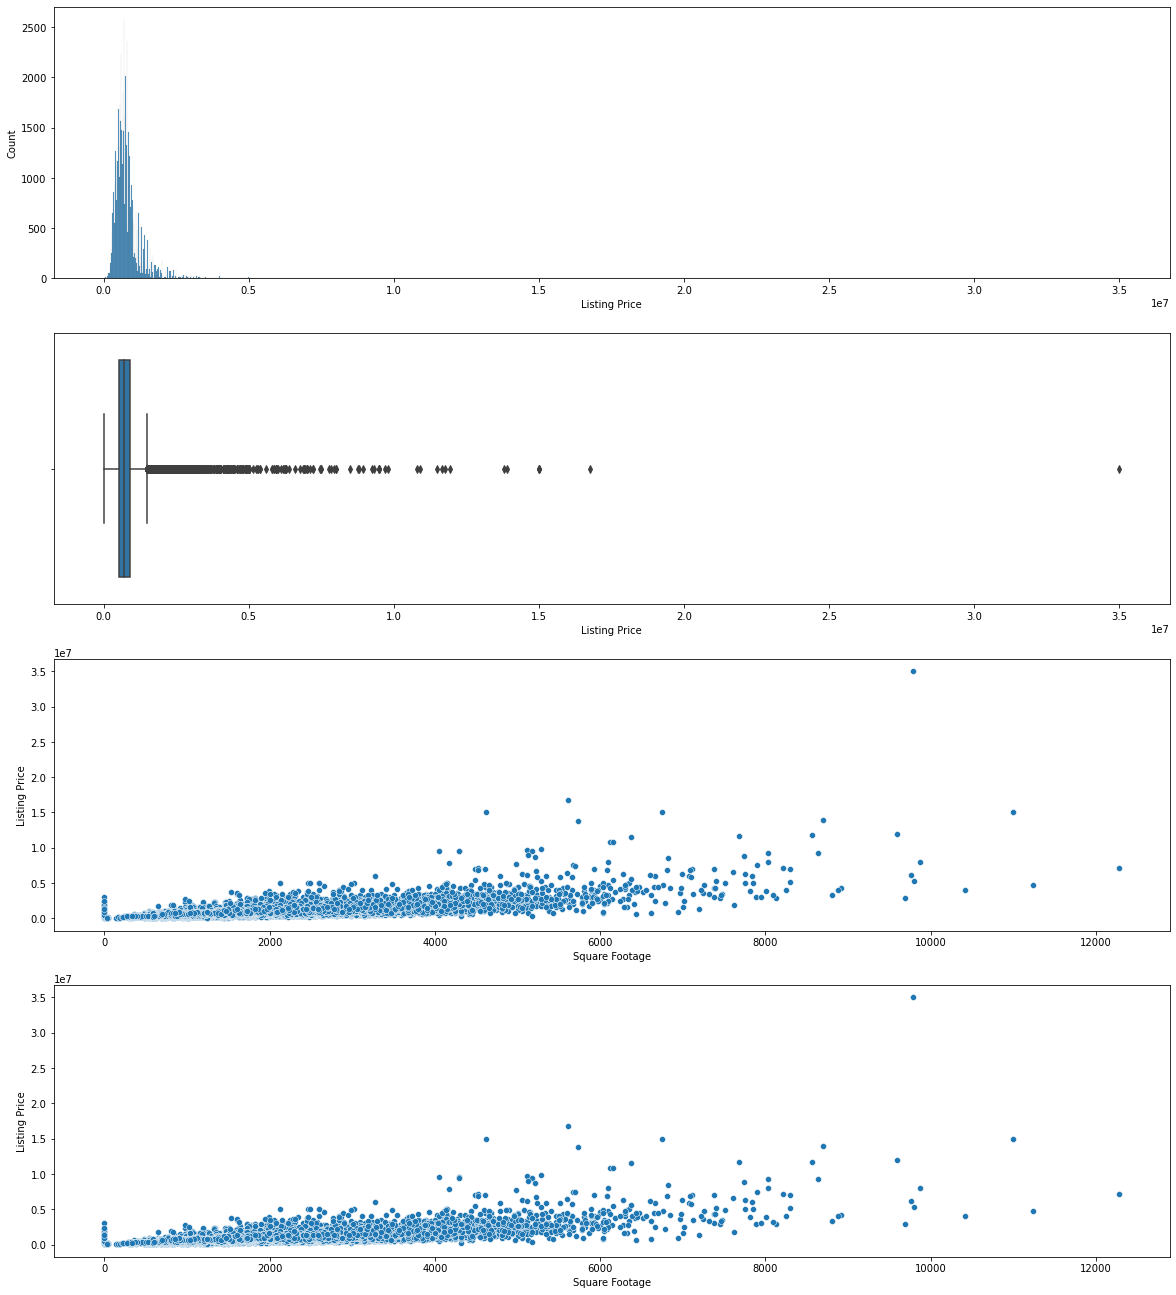

In [19]:
#Histogram of prices
#Box plot of prices
#Scatterplot of prices vs square footage
#Scatterplot of prices vs lot size

f,ax = plt.subplots(4,1,figsize=(20,23))
sns.histplot(x = 'Listing Price',data=data, ax=ax[0])
sns.boxplot(x = 'Listing Price',data=data, ax=ax[1])
sns.scatterplot(x= 'Square Footage',y = 'Listing Price',data=data, ax=ax[2])
sns.scatterplot(x= 'Square Footage',y = 'Listing Price',data=data, ax=ax[3])

In [20]:
#DATA CLEANING

data['Listing Price'] = data['Listing Price'].round(decimals=2)

In [21]:
#Houses where bedroom is 0

data.loc[(data['Bedrooms'] == 0)].head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Square Footage,Style Code
41,98116,1,0,14760.0,198500,355,34
236,98116,3,0,4080.0,1900000,1000,10
261,98118,0,0,5715.0,95000,1500,11
293,98118,2,0,3180.0,445000,1740,16
472,98122,0,0,4600.0,650000,1060,10


In [22]:
#Houses with 0 bathrooms

data.loc[(data['Bathrooms'] == 0)].head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Square Footage,Style Code
38,98126,0,1,15732.0,199950,494,30
261,98118,0,0,5715.0,95000,1500,11
350,98144,0,1,6780.0,218000,417,34
392,98102,0,1,8000.0,229000,390,33
393,98122,0,1,14400.0,220000,503,33


In [23]:
#Check the outliers (most expensive)

data.sort_values(by=['Listing Price'],ascending=False).head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Square Footage,Style Code
51146,98122,4,6,50705.0,35000000,9791,18
39640,98112,4,4,32856.0,16750000,5612,15
26504,98112,4,3,64981.0,15000000,6750,18
12183,98102,5,6,31000.0,15000000,11000,15
52215,98105,4,3,67106.0,15000000,4620,16


In [24]:
#Check the outliers (cheapest)

data.loc[(data['Listing Price'] > 0)].sort_values(by=['Listing Price']).head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Square Footage,Style Code
9452,98188,2,0,0.0,20000,950,21
28703,98133,2,0,0.0,25000,840,20
24452,98102,0,0,4064.0,39950,168,30
37726,98109,0,0,7200.0,40000,185,30
2597,98118,0,0,129500.0,40000,300,45


In [25]:
#Check the outliers (widest sqft_living)

data.sort_values(by=['Square Footage'],ascending=False).head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Square Footage,Style Code
34007,98112,7,6,16874.0,7125000,12280,15
15176,98177,8,8,194167.0,4800000,11240,15
12183,98102,5,6,31000.0,15000000,11000,15
30297,98112,5,6,10000.0,3995000,10416,18
754,98104,0,0,10.0,8000000,9876,30


In [26]:
#Create dataframe of missing datapoint by appending price = 0 and bedrooms = 0

missing = data.loc[(data['Listing Price'] == 0)].append(data.loc[(data['Bathrooms'] == 0)])

In [27]:
# Create list that contains index of error datapoint

missing_index_list = missing.reset_index()['index'].to_list()

In [28]:
# Sort the list so it won't change the index

missing_index_list.sort(reverse = True)

In [29]:
# Drop error datapoint

data = data.drop(missing_index_list,axis=0)

In [30]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Square Footage,Style Code
0,98168,2,2,0.0,117000,999,30
1,98168,2,1,0.0,145000,1234,34
2,98168,2,1,0.0,135000,1270,30
3,98146,2,1,6973.0,159950,650,10
4,98168,2,1,0.0,149900,1302,30


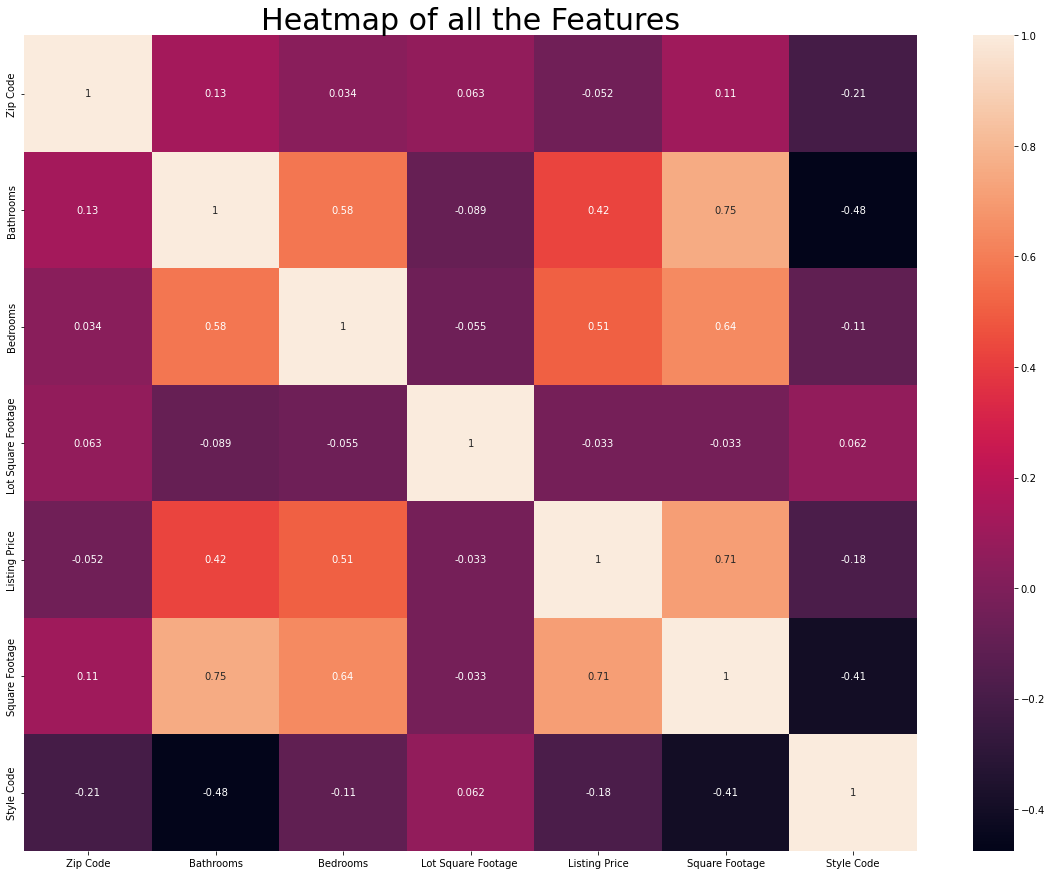

In [31]:
#Correlation Check

features = data
encoder = LabelEncoder()
features['Zip Code'] = encoder.fit_transform(features['Zip Code'])

plt.figure(figsize=(20,15))
sns.heatmap(features.corr(), annot=True)
plt.title("Heatmap of all the Features", fontsize = 30);
plt.show()


In [32]:
#Split data to X for variable input, and y for target class

y = features['Listing Price']
X = features

In [33]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
##### LINEAR REGRESSION MODEL #####

reg = LinearRegression()
reg.fit(X_train, y_train)

print('coef of determination training ', reg.score(X_train, y_train))
print('coef of determination testing ', reg.score(X_test, y_test))
print()
print('coefficient')
print(reg.coef_)
print()
print('intercept')
print(reg.intercept_)
print()
reg_pred = list(reg.predict(X_test))
for i in reg_pred[0:10]:
  print('Prediction price of house', reg_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
reg_mae = reg.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, reg_mae))
mse = mean_squared_error(y_test,reg_pred)
print('Root Mean Square Error : ', np.sqrt(mse))

coef of determination training  1.0
coef of determination testing  1.0

coefficient
[-1.09438596e-12  1.85032847e-10  5.04299218e-11 -1.58174602e-15
  1.00000000e+00 -4.14412072e-15 -2.96373807e-13]

intercept
1.1641532182693481e-10

Prediction price of house 1 : $ 499000.0000000006
Prediction price of house 2 : $ 660000.0000000001
Prediction price of house 3 : $ 464950.0000000001
Prediction price of house 4 : $ 319000.0
Prediction price of house 5 : $ 824999.9999999999
Prediction price of house 6 : $ 1050000.0
Prediction price of house 7 : $ 949950.0
Prediction price of house 8 : $ 649999.9999999999
Prediction price of house 9 : $ 455451.0000000001
Prediction price of house 10 : $ 1100000.0

Real price of house 1 : $ 499000
Real price of house 2 : $ 660000
Real price of house 3 : $ 464950
Real price of house 4 : $ 319000
Real price of house 5 : $ 825000
Real price of house 6 : $ 1050000
Real price of house 7 : $ 949950
Real price of house 8 : $ 650000
Real price of house 9 : $ 455451


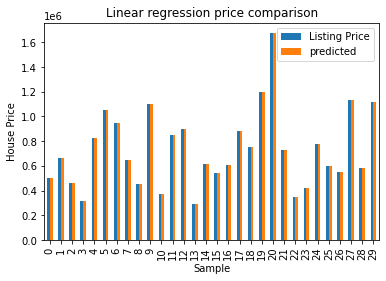

In [35]:
#VISUALIZE LINEAR REGRESSION MODEL

reg_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
reg_pred_price = pd.DataFrame(reg_pred[:30], columns = ['predicted'])
reg_result = pd.concat([reg_real_price, reg_pred_price], axis=1) 
reg_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (30, 15)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

In [36]:
##### DECISION TREE MODEL #####

dt = DecisionTreeRegressor(max_depth=18)
dt.fit(X_train, y_train)

print('coef of determination training ',dt.score(X_train, y_train))
print('coef of determination testing ',dt.score(X_test, y_test))
print()
print('prediction')
dt_pred = list(dt.predict(X_test))
for i in dt_pred[0:10]:
  print('Prediction price of house', dt_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
dt_mae = dt.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, dt_mae))
mse = mean_squared_error(y_test,dt_pred)
print('Root Mean Square Error : ', np.sqrt(mse))

coef of determination training  0.9999999999999987
coef of determination testing  0.9994819912227036

prediction
Prediction price of house 1 : $ 499000.0
Prediction price of house 2 : $ 660000.0
Prediction price of house 3 : $ 464950.0
Prediction price of house 4 : $ 319000.0
Prediction price of house 5 : $ 825000.0
Prediction price of house 6 : $ 1050000.0
Prediction price of house 7 : $ 949950.0
Prediction price of house 8 : $ 650000.0
Prediction price of house 9 : $ 455300.0
Prediction price of house 10 : $ 1100000.0

Real price of house 1 : $ 499000
Real price of house 2 : $ 660000
Real price of house 3 : $ 464950
Real price of house 4 : $ 319000
Real price of house 5 : $ 825000
Real price of house 6 : $ 1050000
Real price of house 7 : $ 949950
Real price of house 8 : $ 650000
Real price of house 9 : $ 455451
Real price of house 10 : $ 1100000

Mean Absolute Error:  0.0002978483228757703
Root Mean Square Error :  12370.18631975796


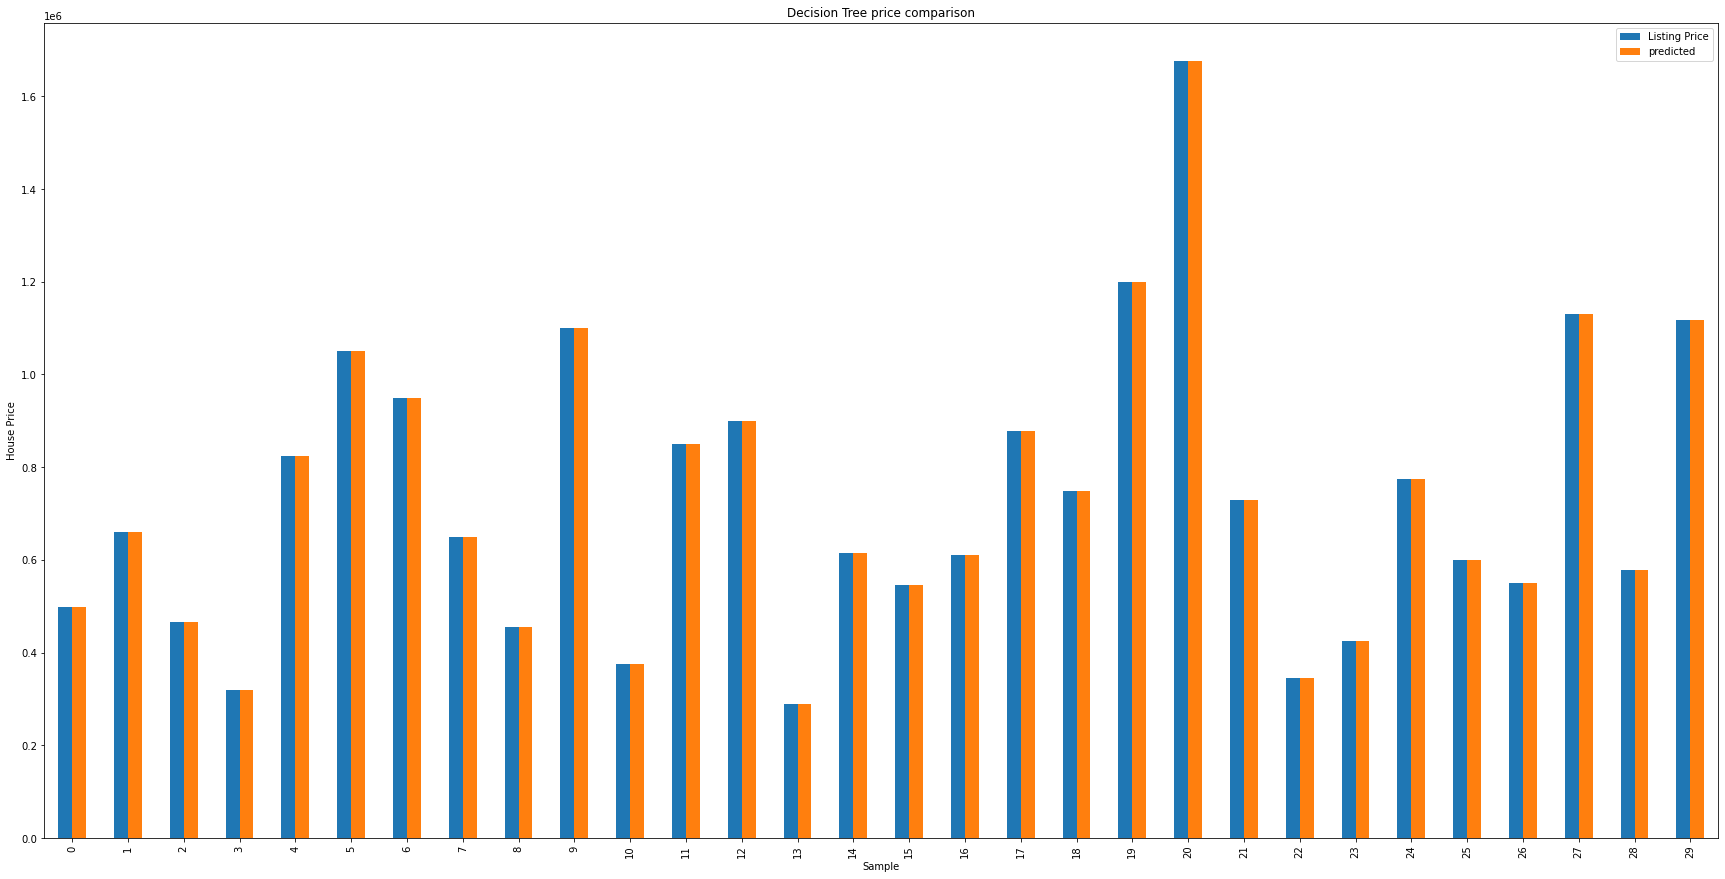

In [37]:
#VISUALIZE DECISION TREE

dt_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
dt_pred_price = pd.DataFrame(dt_pred[:30], columns = ['predicted'])
dt_result = pd.concat([dt_real_price, dt_pred_price], axis=1) 
dt_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (30, 15)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

In [38]:
##### RANDOM FOREST MODEL #####

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print('coef of determination training ',rf.score(X_train, y_train))
print('coef of determination testing ',rf.score(X_test, y_test))
print()
print('prediction')
rf_pred = list(rf.predict(X_test))
for i in rf_pred[0:10]:
  print('Prediction price of house', rf_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
rf_mae = rf.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, rf_mae))

mse = mean_squared_error(y_test,rf_pred)
print('Root Mean Square Error : ', np.sqrt(mse))

coef of determination training  0.9954656467272003
coef of determination testing  0.9968990077449645

prediction
Prediction price of house 1 : $ 499000.0
Prediction price of house 2 : $ 660000.0
Prediction price of house 3 : $ 464950.4
Prediction price of house 4 : $ 318982.0
Prediction price of house 5 : $ 825000.0
Prediction price of house 6 : $ 1050000.0
Prediction price of house 7 : $ 949950.0
Prediction price of house 8 : $ 650000.0
Prediction price of house 9 : $ 455482.82
Prediction price of house 10 : $ 1100000.0

Real price of house 1 : $ 499000
Real price of house 2 : $ 660000
Real price of house 3 : $ 464950
Real price of house 4 : $ 319000
Real price of house 5 : $ 825000
Real price of house 6 : $ 1050000
Real price of house 7 : $ 949950
Real price of house 8 : $ 650000
Real price of house 9 : $ 455451
Real price of house 10 : $ 1100000

Mean Absolute Error:  415.47231050785433
Root Mean Square Error :  30266.208704943347


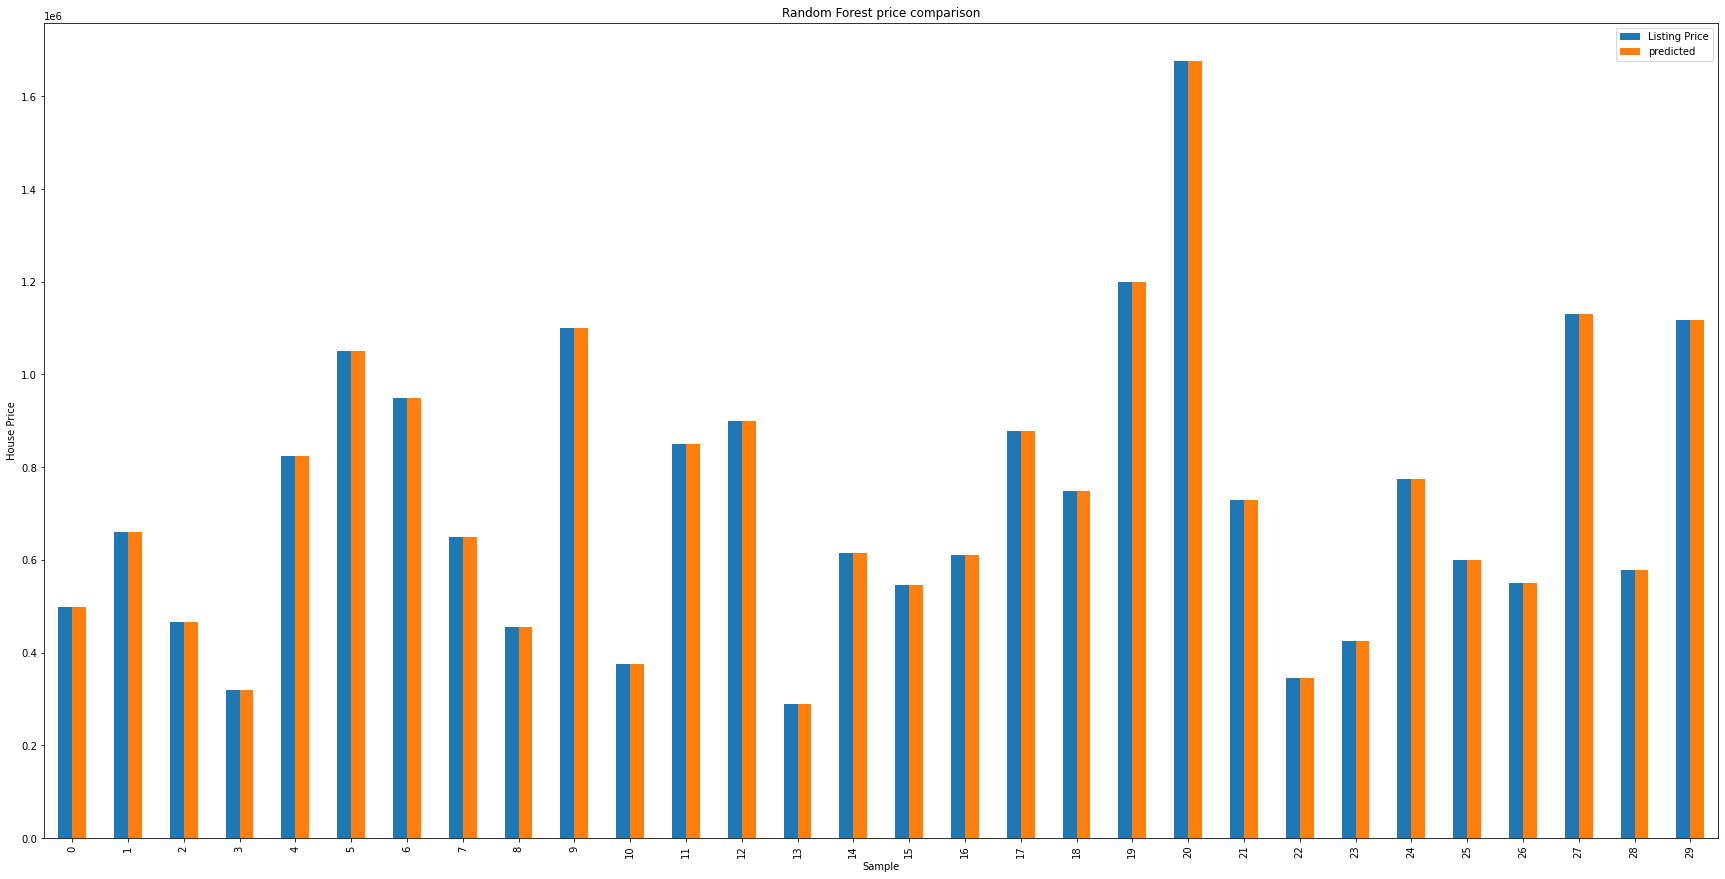

In [39]:
#VISUALIZE RANDOM FOREST MODEL

rf_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
rf_pred_price = pd.DataFrame(rf_pred[:30], columns = ['predicted'])
rf_result = pd.concat([rf_real_price, rf_pred_price], axis=1) 
rf_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (30, 15)
plt.title("Random Forest price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()